In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df= pd.read_csv("combined_dataset.csv")
df.drop(columns=['ranking','isIp','valid'])
df1 = pd.read_csv("All.csv")
labels = ['benign', 'spam']
ndf1 = df1.loc[df1['URL_Type_obf_Type'].isin(labels)]
ndf1['URL_Type_obf_Type'] = ndf1['URL_Type_obf_Type'].map({'benign':1,'spam':2})
ndf1.dropna(inplace=True)

In [2]:
kaggle_df = df
url2016_df= df1
kaggle_df = kaggle_df.sample(frac = 1)

In [27]:
kaggle_df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [3]:

url2016_df= df1
labels = ['benign', 'spam']
url2016_df = url2016_df.loc[url2016_df['URL_Type_obf_Type'].isin(labels)]
url2016_df['URL_Type_obf_Type'] = url2016_df['URL_Type_obf_Type'].map({'benign':1,'spam':2})
url2016_df.dropna(inplace=True)

In [4]:
base_set_data = kaggle_df[0:len(kaggle_df)//3]
good_update_set = kaggle_df[len(kaggle_df)//3:len(kaggle_df)//3+11323]
bad_update_set = kaggle_df[len(kaggle_df)//3+11323:len(kaggle_df)]


In [5]:
bad_update_set['label']=bad_update_set['label'].map({0:1,1:0})

In [6]:
def model(ndf):
    y= ndf['label']
    x=ndf.drop(columns=['domain','label','ranking','isIp','valid'])
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=42)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(y_test, predictions)

def update_model(base, new_data):
    ndf = pd.concat([base,new_data])
    y= ndf['label']
    x=ndf.drop(columns=['domain','label','ranking','isIp','valid'])
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2,random_state=42)
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    return accuracy_score(y_test, predictions)

In [7]:
base= model(base_set_data)
good_data= update_model(base_set_data,good_update_set)

df= pd.concat([base_set_data,good_update_set])
model_with_agg= update_model(good_update_set,df)
bad_data= update_model(bad_update_set,base_set_data)

print('Base Model Acc:',base)
print('Good Data1 Model Acc:',good_data)
print('Adding good1 data to base data then test on good2 data: Model Acc:',model_with_agg)
print('Bad_Data Model Acc:',bad_data)

Base Model Acc: 0.8332812011260556
Good Data1 Model Acc: 0.8364707241020903
Adding good1 data to base data then test on good2 data: Model Acc: 0.823141706334676
Bad_Data Model Acc: 0.5644875280766048


In [21]:
class Actors:
 
 
    def __init__(self,balance):
        self.weight = 0 #init weights are set to 0
        self.balance = balance #This is the actors init balance
    def show_weight(self):
        print(self.weight)
    def show_balance(self):
        print(self.balance)
    def get_weight(self):
        return(self.weight)
    def get_balance(self):
        return(self.balance)
    def update_weight(self,val):
        self.weight += val
    def update_balance(self,val):
        self.balance += val
    def stake(self,amount):
        self.balance -= amount

    def simulate(self,base_set,update_set,tag=0):
        balance_list=[]
        for i in range(0,100):
            base = model(base_set)
            if tag ==1:
                update = update_set
            else:
                update = update_set.sample(3000,replace=True)

            new = update_model(base_set,update)

            weight = new - base
            self.update_weight(weight)
            #good.show_weight()
            
            stake = 1
            self.stake(stake)
            #good.show_balance()
            reward = stake + (stake*weight) 
            
            if weight < 0:

                self.update_balance(-stake)
        

            else:
                self.update_balance(reward)
            
            
            if self.get_balance() < 0:
                balance_list.append(0)
                continue

            self.update_balance(reward)
            #good.show_balance()
            balance = self.get_balance()
            balance_list.append(balance)
        return balance_list



Types of bad actors

1. Giving wrong data on purpose (flip labels) - will always decrease accuracy and they lose stake 

2. Repeat giving the same data point (that you know increases accuracy) - need some way to check for same data from same user
3. Collborating by giving the same data point (that you know increases accuracy) as someone else - ???

4. Giving hardcoded data based on other data that increase acc

In [9]:
good = Actors(10)
bad_flipped= Actors(10)
bad_same_data= Actors(10)

good_balance = good.simulate(base_set_data,good_update_set)
bad_balance = bad_flipped.simulate(base_set_data,bad_update_set)

In [24]:
bad_same_data= Actors(10)
bad_balance_same= bad_same_data.simulate(base_set_data,good_update_set,1)

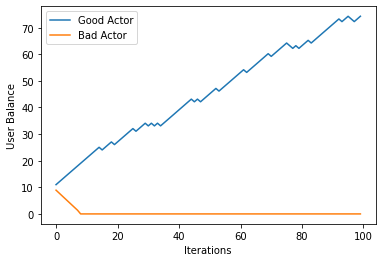

In [26]:
import matplotlib.pyplot as plt
x= [i for i in range(0,100)]
plt.plot(x,good_balance,label='Good Actor')
plt.plot(x,bad_balance, label='Bad Actor')
plt.xlabel('Iterations')
plt.ylabel('User Balance')
plt.legend()